# House Price Prediction Regression Project

## Loading Modules and Libraries

In [1]:
# Loading Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler



## Loading DataSet

In [2]:
train_data_path = r"C:\Users\91938\OneDrive\Desktop\House_Price_Prediction\data\train.csv"
test_data_path = r"C:\Users\91938\OneDrive\Desktop\House_Price_Prediction\data\test.csv"

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

print("Shape of Data frame of Training set: " , train_df.shape)
print("Shape of Data frame of Test set: " , test_df.shape)

Shape of Data frame of Training set:  (1460, 81)
Shape of Data frame of Test set:  (1459, 80)


In [3]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [4]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [339]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Data Integration

## Integrating train and test data

In [6]:
df=pd.concat([train_df,test_df])
print("Shape of Integrated Dataframe: ", df.shape)

Shape of Integrated Dataframe:  (2919, 81)


In [7]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1455          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1456          1996     Gable  CompShg     VinylSd     VinylSd        NaN   
1457          1992     Gable  CompShg     HdBoard     Wd Shng        NaN   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1454         0.0        TA        TA     CBlock       TA       TA   
1455         0.0        TA        TA     CBlock       TA       TA   
1456         0.0        TA        TA     CBlock       TA       TA   
1457         0.0        TA        TA      PConc       Gd       TA   
1458        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454           No          Unf         0.0          Unf         0.0   
1455           No          Rec       252.0          Unf         0.0   
1456           No          ALQ      1224.0          Unf         0.0   
1457           Av          GLQ       337.0          Unf         0.0   
1458           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1454      546.0        546.0    GasA        Gd          Y      SBrkr   
1455      294.0        546.0    GasA        TA          Y      SBrkr   
1456        0.0       1224.0    GasA        Ex          Y      SBrkr   
1457      575.0        912.0    GasA        TA          Y      SBrkr   
1458      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454       546       546             0       1092           0.0           0.0   
1455       546       546             0       1092           0.0           0.0   
1456      1224         0             0       1224           1.0           0.0   
1457       970         0             0        970           0.0           1.0   
1458       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1454         1         1             3             1          TA   
1455         1         1             3             1          TA   
1456         1         0             4             1          TA   
1457         1         0             3             1          TA   
1458         2         1             3             1          TA   

   

## Brief Information about dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

## Number of Integer Features

In [10]:
int_features=df.select_dtypes(["int64"]).columns

print("Number of Integer Features in the Dataset is: ",int_features.shape[0])
print("Integer Features are: \n", int_features.tolist())

Number of Integer Features in the Dataset is:  26
Integer Features are: 
 ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


## Number of Float Features

In [11]:
float_features=df.select_dtypes(["float64"]).columns

print("Number of Float Features in the Dataset is: ",float_features.shape[0])
print("Flaot Features are: \n", float_features.tolist())

Number of Float Features in the Dataset is:  12
Flaot Features are: 
 ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


## Number of Categorical Features

In [12]:
cat_features=df.select_dtypes(["object"]).columns

print("Number of Categorical Features in the Dataset is: ",cat_features.shape[0])
print("Categorical Features are: \n", cat_features.tolist())

Number of Categorical Features in the Dataset is:  43
Categorical Features are: 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Data Cleaning Process...

## Statistical Information 

In [340]:
df.describe()


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

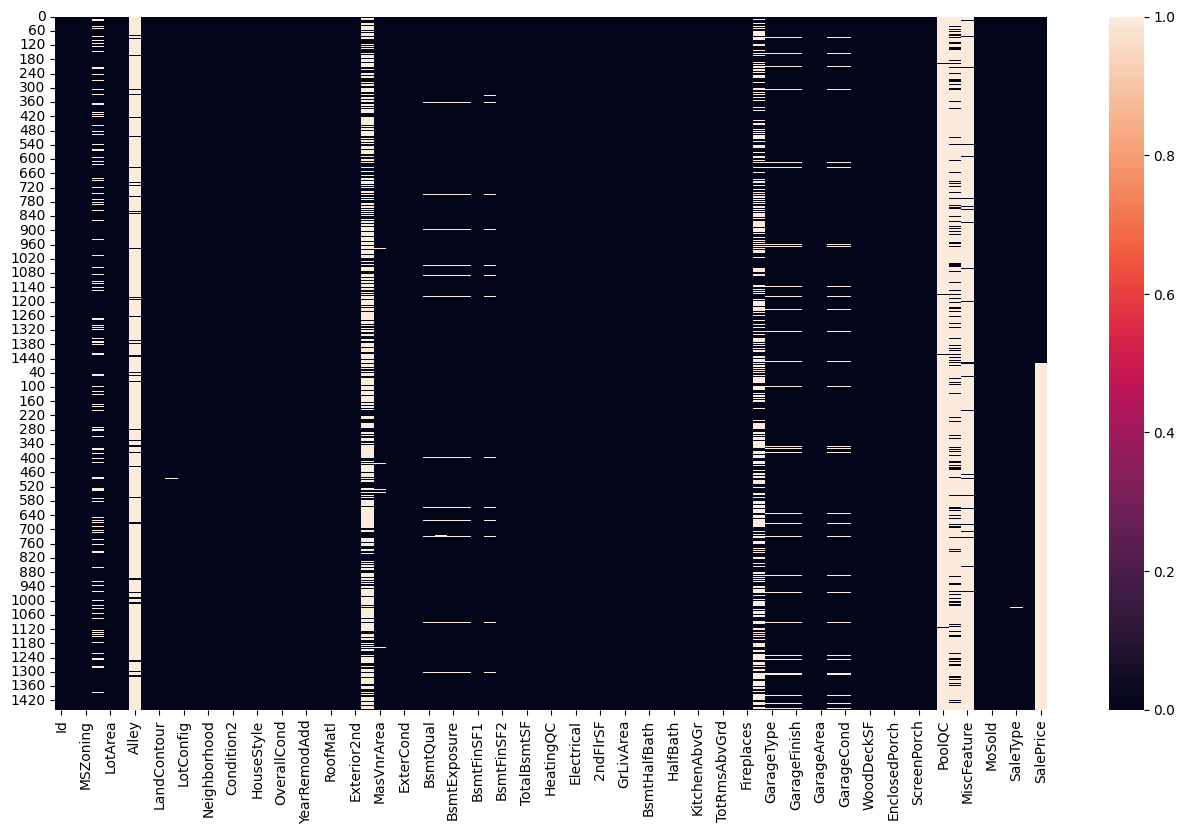

In [341]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/Heatmap_df_of_nullValues")

## Mathematical data of null value features

### Number of null values in each feature

In [342]:
null_count=df.isnull().sum()
print(null_count)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Percentage of null values in each feature

In [343]:
null_percent=(df.isnull().sum()/df.shape[0])*100
print(null_percent)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

## Dropping most null features or columns

### There are no such columns or features in the dataset which needs to be dropped cause...
### 1. The most null features like Alley, PoolQC, Fence, MiscFeature, FireplaceQu are categorical and could not be dropped as null values in these columns represent some category.
### 2. Next some features are actually null but those features have just a small percentage of null values which need not to be dropped as dropping these features leads to loss of information and leads to inacuuracy.

## Missing Value Imputation

In [344]:
miss_val_feat = null_percent[null_percent>0]
print("The number of missing values features are: ",len(miss_val_feat))
miss_val_feat

The number of missing values features are:  35


MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [345]:
miss_cat_feat=miss_val_feat[miss_val_feat.keys().isin(cat_features)]
print("Total number of missing categorical features: ",len(miss_cat_feat))
miss_cat_feat

Total number of missing categorical features:  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [346]:
miss_int_feat=miss_val_feat[miss_val_feat.keys().isin(int_features)]
print("Total number of missing Integer features: ",len(miss_int_feat))
miss_int_feat

Total number of missing Integer features:  0


Series([], dtype: float64)

In [347]:
miss_float_feat=miss_val_feat[miss_val_feat.keys().isin(float_features)]
print("Total number of missing Float features: ",len(miss_float_feat))
miss_float_feat

Total number of missing Float features:  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

### Creating a copy of original dataframe to perform value imputations

In [348]:
df_mvi=df.copy()
df_mvi.shape

(2919, 81)

### Functions to Visualize old and new distribution after missing value imputations

In [349]:
def oldNewCountPlot(df,df_new,feature,x_labels="horizontal"):
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    sns.countplot(df[feature],x=df[feature].keys())
    plt.xticks(rotation=x_labels)
    plt.title("Old "+feature+" Distribution")
    plt.subplot(122)
    sns.countplot(df_new[feature],x=df_new[feature].keys())
    plt.xticks(rotation=x_labels)
    plt.title("New "+feature+" Distribution")

In [350]:
def boxDistPlot(df,feature):
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    sns.boxplot(df[feature],x=df[feature])
    plt.title("Boxplot of "+feature)
    plt.subplot(122)
    sns.distplot(df[feature],x=df[feature])
    plt.title("Distplot of "+feature)

In [351]:
def oldNewBoxDisPlot(df,df_new,feature):
    plt.figure(figsize=(16,10))
    plt.subplot(221)
    sns.boxplot(df[feature],x=df[feature])
    plt.title("BoxPlot of Old "+feature+" distribution")
    plt.subplot(222)
    sns.distplot(df[feature],x=df[feature])
    plt.title("DistPlot of Old "+feature+" distribution")
    
    plt.subplot(223)
    sns.boxplot(df_new[feature],x=df_new[feature])
    plt.title("BoxPlot of New "+feature+" distribution")
    plt.subplot(224)
    sns.distplot(df_new[feature],x=df_new[feature])
    plt.title("DistPlot of New "+feature+" distribution")

### 1. Handling "MSZoning" missing values

In [352]:
df_mvi["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [353]:
MSZoning_mode=df["MSZoning"].mode()[0]
MSZoning_mode

'RL'

In [354]:
df_mvi["MSZoning"].replace(np.nan,MSZoning_mode,inplace=True)
df_mvi["MSZoning"].isnull().sum()

0

In [355]:
df_mvi["MSZoning"].value_counts()

MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

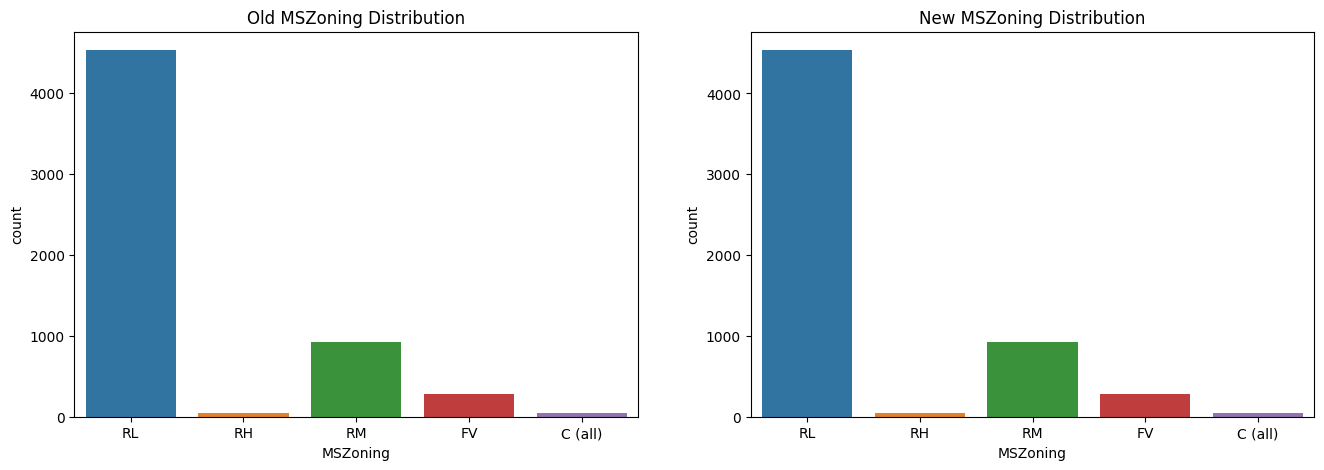

In [356]:
oldNewCountPlot(df,df_mvi,"MSZoning")

### 2. Handling "LotFrontage" missing values

In [357]:
df_mvi["LotFrontage"].value_counts()

LotFrontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
65.0      93
85.0      76
21.0      50
24.0      49
63.0      47
90.0      46
78.0      46
68.0      44
64.0      43
74.0      39
72.0      39
73.0      33
62.0      31
79.0      28
100.0     28
82.0      28
52.0      28
51.0      27
59.0      27
57.0      26
66.0      26
76.0      25
55.0      24
53.0      24
43.0      23
88.0      22
67.0      22
69.0      20
35.0      19
71.0      19
56.0      19
44.0      19
84.0      18
81.0      18
58.0      17
61.0      17
48.0      16
40.0      16
34.0      16
86.0      15
92.0      15
95.0      15
110.0     15
77.0      15
41.0      14
120.0     14
91.0      14
96.0      14
83.0      13
93.0      13
94.0      12
42.0      12
105.0     12
98.0      12
87.0      11
107.0     11
30.0      11
54.0      10
45.0      10
89.0      10
102.0     10
47.0       8
36.0       8
32.0       8
37.0       7
39.0       6
99.0       6
103.0      6
108.0      6
114.0      5
104.0      5


In [358]:
LotFrontage_mean=df_mvi["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan,LotFrontage_mean,inplace=True)
df_mvi["LotFrontage"].isnull().sum()

0

c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91938\AppData\Local\Temp\ipykernel_6728\995379517.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature],x=df[feature])
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

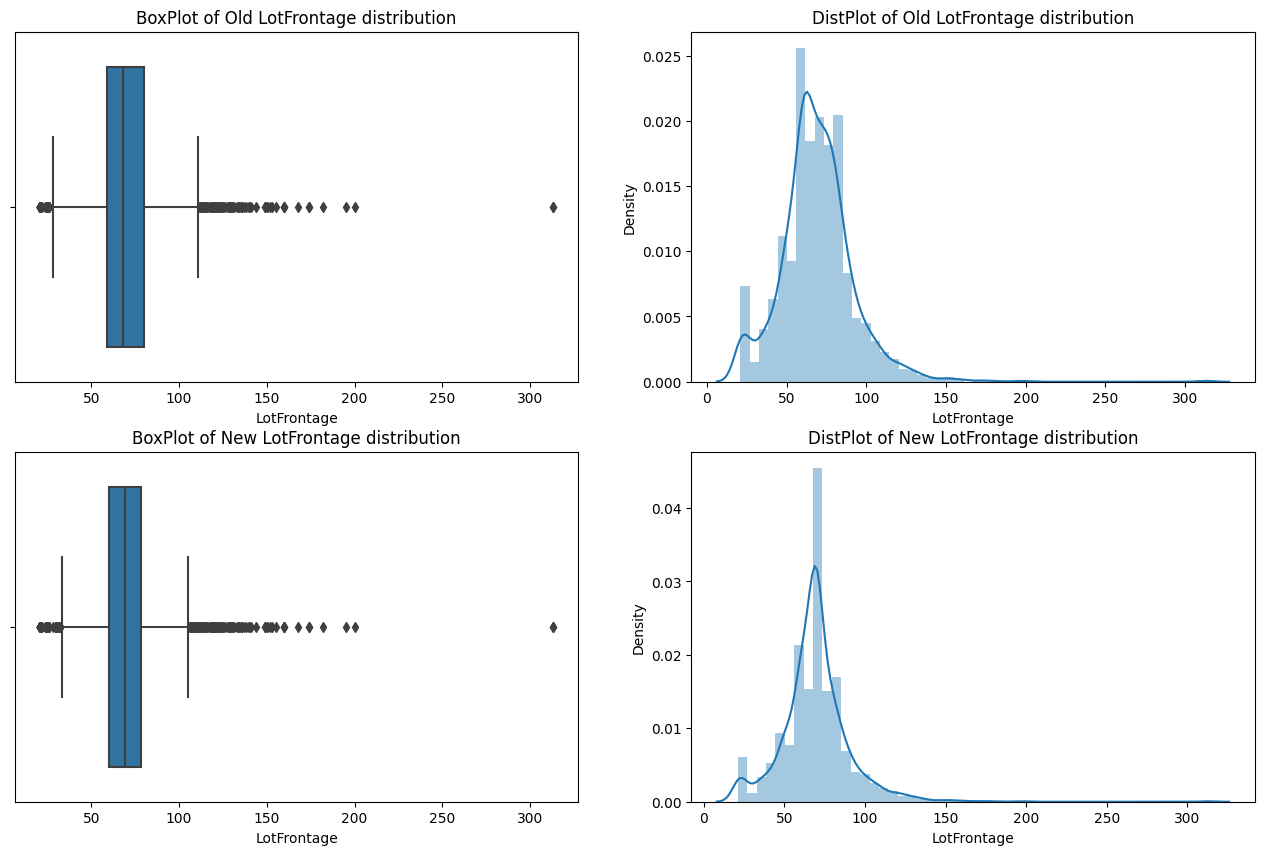

In [359]:
oldNewBoxDisPlot(df,df_mvi,"LotFrontage")

### 3. Handling "Alley" missing values 

In [360]:
df_mvi["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [361]:
Alley_const="NA"
df_mvi["Alley"].replace(np.nan,Alley_const,inplace=True)
df_mvi["Alley"].isnull().sum()

0

In [362]:
df_mvi["Alley"].value_counts()

Alley
NA      2721
Grvl     120
Pave      78
Name: count, dtype: int64

c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

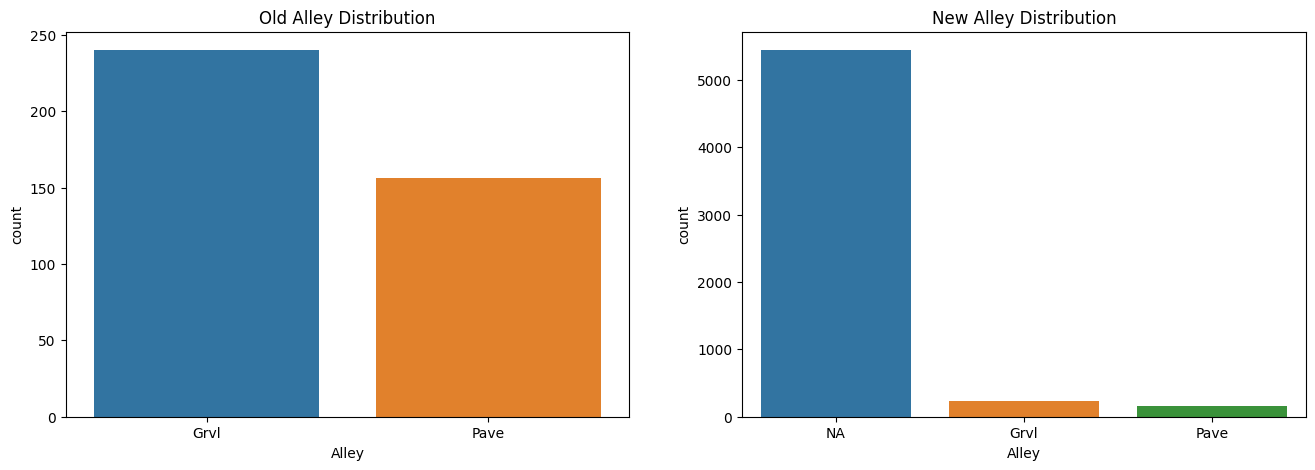

In [363]:
oldNewCountPlot(df,df_mvi,"Alley")

### 4. Handling "Utilities" missing values

In [364]:
df_mvi["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [365]:
Utilities_mode=df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan,Utilities_mode,inplace=True)
df_mvi["Utilities"].isnull().sum()

0

In [366]:
df_mvi["Utilities"].value_counts()

Utilities
AllPub    2918
NoSeWa       1
Name: count, dtype: int64

c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

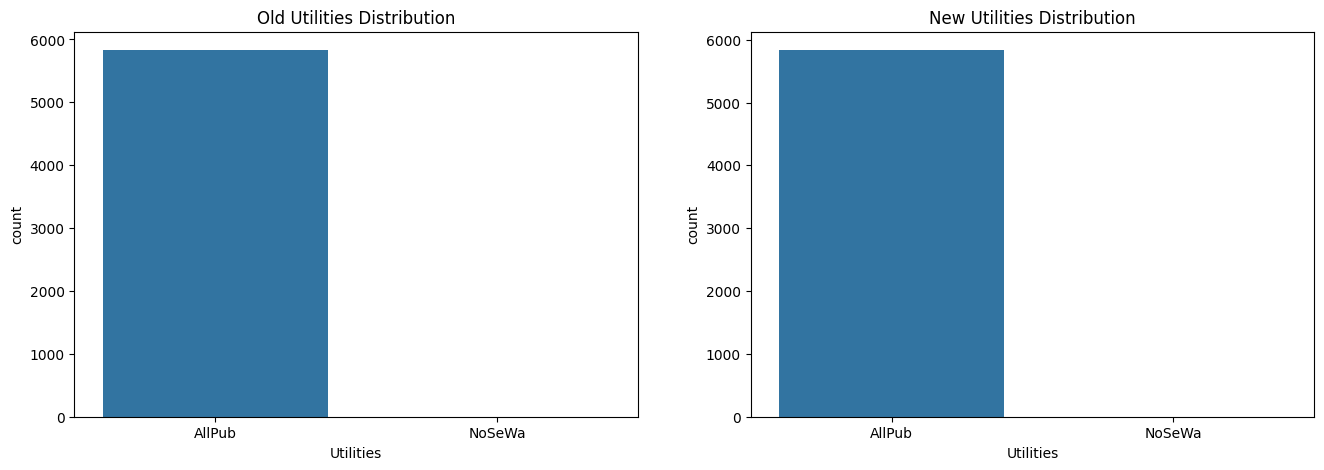

In [367]:
oldNewCountPlot(df,df_mvi,"Utilities")

### 5. Handling "Exterior1st" and "Exterior2nd" missing values

In [368]:
df_mvi["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [369]:
df_mvi["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [370]:
Exterior1st_mode=df["Exterior1st"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan,Exterior1st_mode,inplace=True)
df_mvi["Exterior1st"].isnull().sum()

0

In [371]:
Exterior2nd_mode=df["Exterior2nd"].mode()[0]
df_mvi["Exterior2nd"].replace(np.nan,Exterior2nd_mode,inplace=True)
df_mvi["Exterior2nd"].isnull().sum()

0

c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

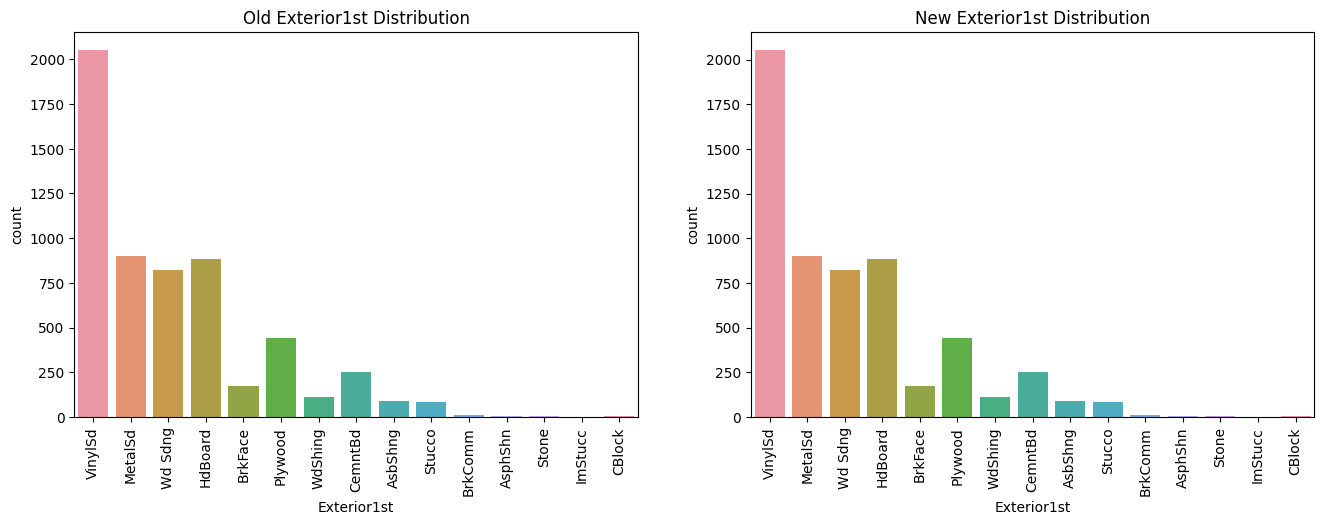

In [372]:
oldNewCountPlot(df,df_mvi,"Exterior1st","vertical")

c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

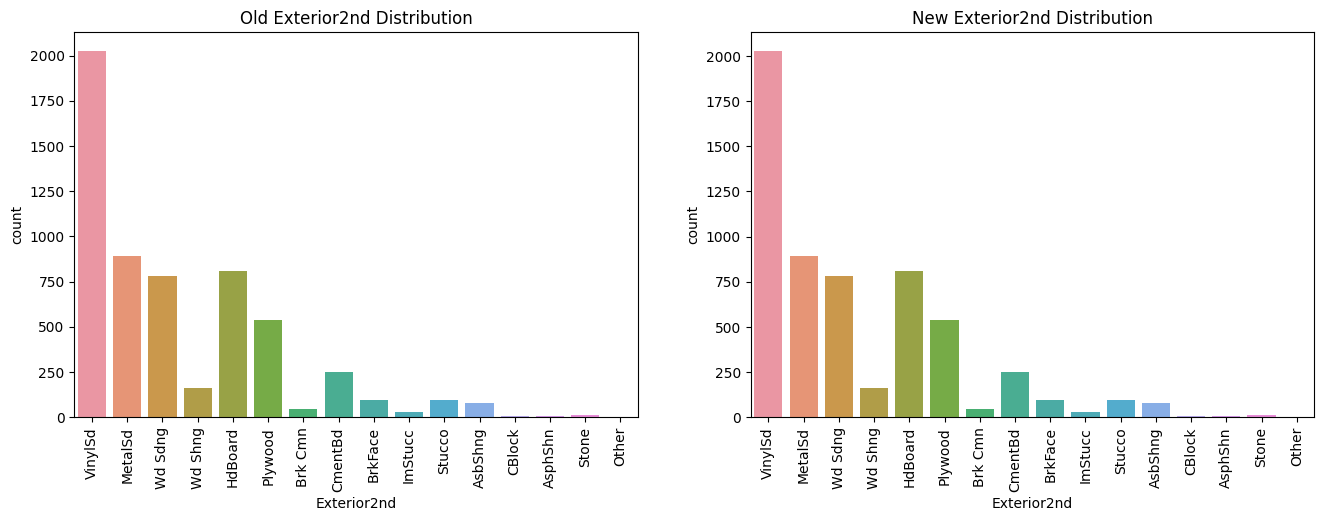

In [373]:
oldNewCountPlot(df,df_mvi,"Exterior2nd","vertical")

### 6. Handling "MasVnrType" and "MasVnrArea" missing values

In [374]:





df["MasVnrType"].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

<Axes: >

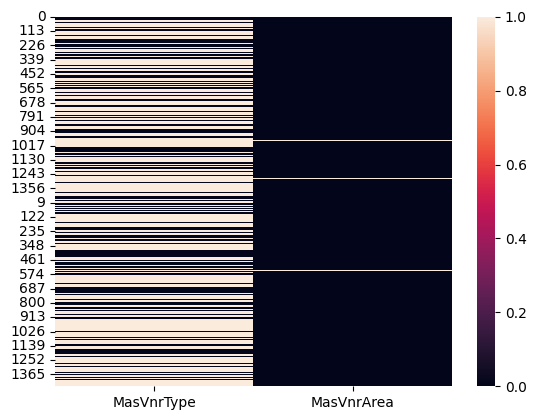

In [375]:
sns.heatmap(df_mvi[["MasVnrType","MasVnrArea"]].isnull())

In [376]:
df_mvi[df_mvi[["MasVnrType","MasVnrArea"]].isnull().any(axis=1)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1        2          20       RL    80.000000     9600   Pave    NA      Reg   
3        4          70       RL    60.000000     9550   Pave    NA      IR1   
5        6          50       RL    85.000000    14115   Pave    NA      IR1   
8        9          50       RM    51.000000     6120   Pave    NA      Reg   
9       10         190       RL    50.000000     7420   Pave    NA      Reg   
10      11          20       RL    70.000000    11200   Pave    NA      Reg   
12      13          20       RL    69.305795    12968   Pave    NA      IR2   
15      16          45       RM    51.000000     6120   Pave    NA      Reg   
17      18          90       RL    72.000000    10791   Pave    NA      Reg   
18      19          20       RL    66.000000    13695   Pave    NA      Reg   
19      20          20       RL    70.000000     7560   Pave    NA      Reg   
21      22          45       RM    57.000000     7449   Pave  Grvl      Reg   
23      24         120       RM    44.000000     4224   Pave    NA      Reg   
24      25          20       RL    69.305795     8246   Pave    NA      IR1   
26      27          20       RL    60.000000     7200   Pave    NA      Reg   
28      29          20       RL    47.000000    16321   Pave    NA      IR1   
29      30          30       RM    60.000000     6324   Pave    NA      IR1   
30      31          70  C (all)    50.000000     8500   Pave  Pave      Reg   
31      32          20       RL    69.305795     8544   Pave    NA      IR1   
32      33          20       RL    85.000000    11049   Pave    NA      Reg   
33      34          20       RL    70.000000    10552   Pave    NA      IR1   
36      37          20       RL   112.000000    10859   Pave    NA      Reg   
38      39          20       RL    68.000000     7922   Pave    NA      Reg   
39      40          90       RL    65.000000     6040   Pave    NA      Reg   
41      42          20       RL   115.000000    16905   Pave    NA      Reg   
42      43          85       RL    69.305795     9180   Pave    NA      IR1   
43      44          20       RL    69.305795     9200   Pave    NA      IR1   
44      45          20       RL    70.000000     7945   Pave    NA      Reg   
46      47          50       RL    48.000000    12822   Pave    NA      IR1   
47      48          20       FV    84.000000    11096   Pave    NA      Reg   
48      49         190       RM    33.000000     4456   Pave    NA      Reg   
49      50          20       RL    66.000000     7742   Pave    NA      Reg   
50      51          60       RL    69.305795    13869   Pave    NA      IR2   
51      52          50       RM    52.000000     6240   Pave    NA      Reg   
52      53          90       RM   110.000000     8472   Grvl    NA      IR2   
53      54          20       RL    68.000000    50271   Pave    NA      IR1   
54      55          80       RL    60.000000     7134   Pave    NA      Reg   
57      58          60       RL    89.000000    11645   Pave    NA      IR1   
59      60          20       RL    60.000000     7200   Pave    NA      Reg   
60      61          20       RL    63.000000    13072   Pave    NA      Reg   
61      62          75       RM    60.000000     7200   Pave    NA      Reg   
63      64          70       RM    50.000000    10300   Pave    NA      IR1   
68      69          30       RM    47.000000     4608   Pave    NA      Reg   
69      70          50       RL    81.000000    15593   Pave    NA      Reg   
71      72          20       RL    69.000000     7599   Pave    NA      Reg   
74      75          50       RM    60.000000     5790   Pave    NA      Reg   
75      76         180       RM    21.000000     1596   Pave    NA      Reg   
76      77          20       RL    69.305795     8475   Pave    NA      IR1   
77      78          50       RM    50.000000     8635   Pave    NA      Reg   
78      79          90       RL    72.000000    10778   Pa

In [377]:
MasVnrType_mode=df_mvi["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan,MasVnrType_mode,inplace=True)
df_mvi["MasVnrType"].isnull().sum()

0

In [378]:
df_mvi["MasVnrType"].value_counts()

MasVnrType
BrkFace    2645
Stone       249
BrkCmn       25
Name: count, dtype: int64

c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91938\AppData\Local\Temp\ipykernel_6728\3017252920.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature],x=df[feature])
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

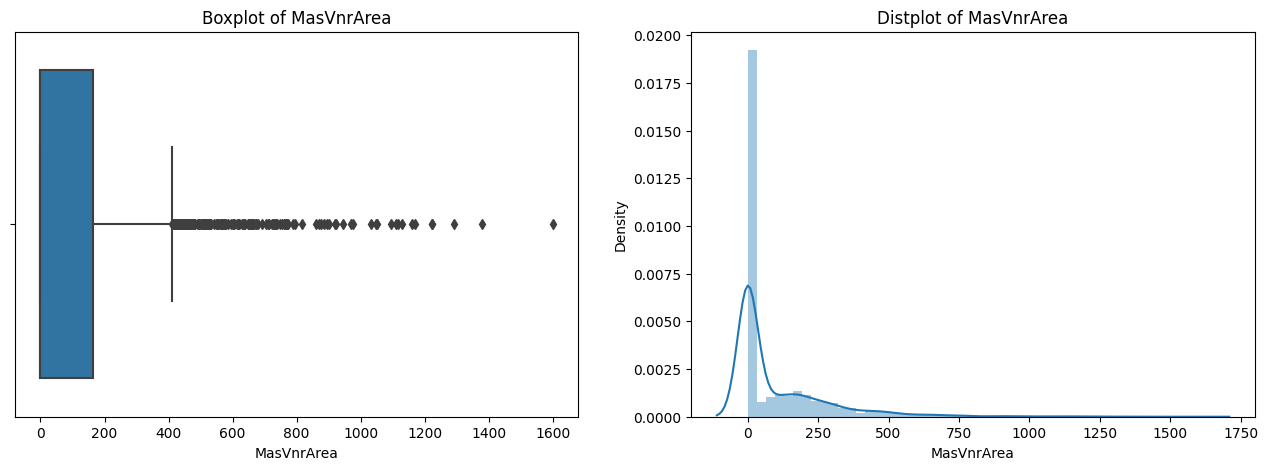

In [379]:
boxDistPlot(df_mvi,"MasVnrArea")

In [380]:
MasVnrArea_const=0
df_mvi["MasVnrArea"].replace(np.nan,MasVnrArea_const,inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

0

c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91938\AppData\Local\Temp\ipykernel_6728\995379517.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature],x=df[feature])
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

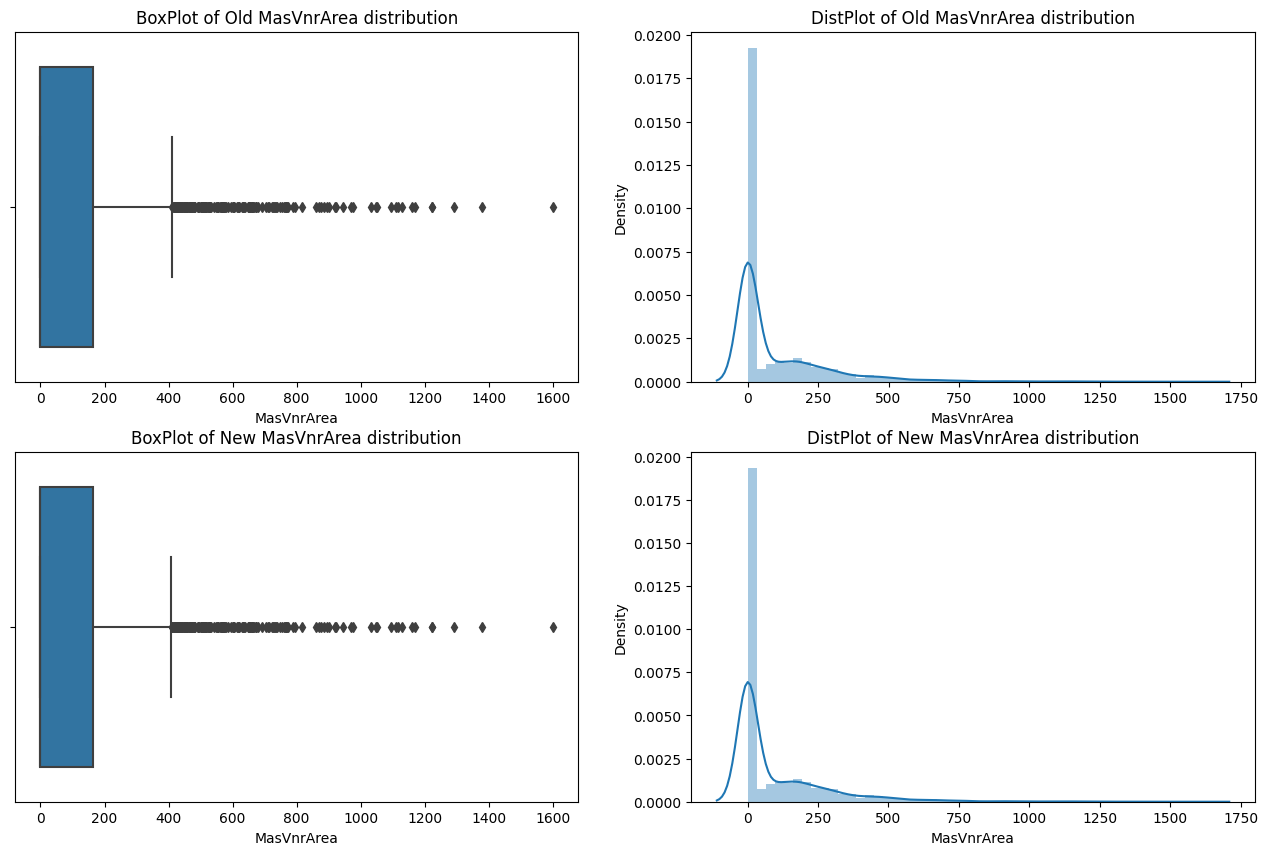

In [381]:
oldNewBoxDisPlot(df,df_mvi,"MasVnrArea")

### 7. Handling Basement features

In [382]:
"""
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665

BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
"""

'\nBsmtQual         2.774923\nBsmtCond         2.809181\nBsmtExposure     2.809181\nBsmtFinType1     2.706406\nBsmtFinType2     2.740665\n\nBsmtFinSF1       0.034258\nBsmtFinSF2       0.034258\nBsmtUnfSF        0.034258\nTotalBsmtSF      0.034258\nBsmtFullBath     0.068517\nBsmtHalfBath     0.068517\n'

In [383]:
cat_bsmt_feat=[
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2"
]

num_bsmt_feat=[
"BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"BsmtFullBath",
"BsmtHalfBath"
]

<Axes: >

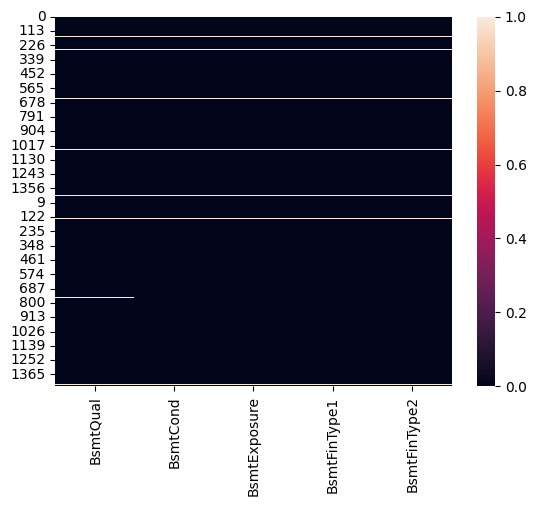

In [384]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [385]:
for feat in cat_bsmt_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of BsmtQual: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
Value count of BsmtCond: BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
Value count of BsmtExposure: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
Value count of BsmtFinType1: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
Value count of BsmtFinType2: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [386]:
cat_bsmt_feat_const="NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan,cat_bsmt_feat_const,inplace=True)

In [387]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [388]:
num_bsmt_feat_const=0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan,num_bsmt_feat_const,inplace=True)

In [389]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

### 8. Handling KitchenQual and Electrical missing values

In [390]:
Electrical_mode=df_mvi["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan,Electrical_mode,inplace=True)
df_mvi["Electrical"].isnull().sum()

0

In [391]:




KitchenQual_mode=df_mvi["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan,KitchenQual_mode,inplace=True)
df_mvi["KitchenQual"].isnull().sum()

0

### 9. Handling Functional and SaleType missing values

In [392]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [393]:
Functional_mode=df_mvi["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan,Functional_mode,inplace=True)
df_mvi["Functional"].isnull().sum()

0

In [394]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [395]:
SaleType_mode=df_mvi["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan,SaleType_mode,inplace=True)
df_mvi["SaleType"].isnull().sum()

0

### 10. Handling FirePlaceQu, PoolQc, Fence and MiscFeature missing values

In [396]:
other_cat_feat=[
    "FireplaceQu",
    "PoolQC",
    "Fence",
    "MiscFeature"
]

In [397]:
for feat in other_cat_feat:
    print(f"Value Counts of {feat}: {df[feat].value_counts()}")

Value Counts of FireplaceQu: FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
Value Counts of PoolQC: PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Value Counts of Fence: Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
Value Counts of MiscFeature: MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [398]:
other_cat_feat_const="NA"
for feat in other_cat_feat:
    df_mvi[feat].replace(np.nan,other_cat_feat_const,inplace=True)

In [399]:
df_mvi[other_cat_feat].isnull().sum()

FireplaceQu    0
PoolQC         0
Fence          0
MiscFeature    0
dtype: int64

In [400]:
for feat in other_cat_feat:
    print(f"Value Counts of {feat}: {df_mvi[feat].value_counts()}")

Value Counts of FireplaceQu: FireplaceQu
NA    1420
Gd     744
TA     592
Fa      74
Po      46
Ex      43
Name: count, dtype: int64
Value Counts of PoolQC: PoolQC
NA    2909
Ex       4
Gd       4
Fa       2
Name: count, dtype: int64
Value Counts of Fence: Fence
NA       2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: count, dtype: int64
Value Counts of MiscFeature: MiscFeature
NA      2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: count, dtype: int64


### Handling "Garage" missing values

In [401]:
"""
GarageType       5.378554 (NA)
GarageFinish     5.447071 (NA)
GarageQual       5.447071 (NA)
GarageCond       5.447071 (NA)

GarageYrBlt      5.447071 (0)
GarageCars       0.034258 (0)
GarageArea       0.034258 (0)
"""

'\nGarageType       5.378554 (NA)\nGarageFinish     5.447071 (NA)\nGarageQual       5.447071 (NA)\nGarageCond       5.447071 (NA)\n\nGarageYrBlt      5.447071 (0)\nGarageCars       0.034258 (0)\nGarageArea       0.034258 (0)\n'

In [402]:
cat_garage_feat=[
"GarageType",
"GarageFinish",
"GarageQual",
"GarageCond"
]

num_garage_feat=[
"GarageYrBlt",
"GarageCars",
"GarageArea"
]

In [403]:
for feat in cat_garage_feat:
    print(f"Value counts of {feat}: {df[feat].value_counts()}")

Value counts of GarageType: GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64
Value counts of GarageFinish: GarageFinish
Unf    1230
RFn     811
Fin     719
Name: count, dtype: int64
Value counts of GarageQual: GarageQual
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: count, dtype: int64
Value counts of GarageCond: GarageCond
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64


In [404]:
cat_garage_feat_const="NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan,cat_garage_feat_const,inplace=True)

In [405]:
df_mvi[cat_garage_feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [406]:
for feat in cat_garage_feat:
    print(f"Value counts of {feat}: {df_mvi[feat].value_counts()}")

Value counts of GarageType: GarageType
Attchd     1723
Detchd      779
BuiltIn     186
NA          157
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64
Value counts of GarageFinish: GarageFinish
Unf    1230
RFn     811
Fin     719
NA      159
Name: count, dtype: int64
Value counts of GarageQual: GarageQual
TA    2604
NA     159
Fa     124
Gd      24
Po       5
Ex       3
Name: count, dtype: int64
Value counts of GarageCond: GarageCond
TA    2654
NA     159
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64


In [407]:
num_garage_feat_const=0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan,num_garage_feat_const,inplace=True)

In [408]:
df_mvi[num_garage_feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [409]:
df_mvi.isnull().any(axis=1).sum()

1459

In [410]:
df_mvi["GarageYrBlt"]=df_mvi["GarageYrBlt"].astype(int)

## Feature Transformation

### Converting Numerical features to Categorical features


#### Converting "MoSold" feature

In [411]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [412]:
calendar.month_abbr[2]

'Feb'

#### Converting Remaining features

### Converting Categorical features into Numerical features

#### Ordinal Encoding

In [413]:
ordinal_end_var=[
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinSF1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Functional",
    "GarageFinish",
    "PavedDrive",
    "Utilities"
]

print("Total number of features to convert into numcerical ordinal form are: ",len(ordinal_end_var))

Total number of features to convert into numcerical ordinal form are:  18


In [414]:
df_mvi["ExterQual"].value_counts()

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64

In [415]:
df_mvi["ExterQual"]=df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [416]:
df_mvi["ExterQual"].value_counts()

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64

In [417]:
df_mvi["BsmtExposure"]=df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA","No","Mn","Av","Gd"],ordered=True)).cat.codes

In [418]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
1    1904
3     418
4     276
2     239
0      82
Name: count, dtype: int64

In [419]:
df_mvi["ExterCond"]=df_mvi["ExterCond"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [420]:
df_mvi["ExterCond"].value_counts()

ExterCond
2    2538
3     299
1      67
4      12
0       3
Name: count, dtype: int64

In [421]:
df_mvi["BsmtQual"]=df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [422]:
df_mvi["BsmtQual"].value_counts()

BsmtQual
3    1283
4    1209
5     258
2      88
0      81
Name: count, dtype: int64

In [423]:
df_mvi["BsmtCond"]=df_mvi["BsmtCond"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [424]:
df_mvi["BsmtCond"].value_counts()

BsmtCond
3    2606
4     122
2     104
0      82
1       5
Name: count, dtype: int64

In [425]:
df_mvi["BsmtFinType1"]=df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes

In [426]:
df_mvi["BsmtFinType1"].value_counts()

BsmtFinType1
1    851
6    849
5    429
3    288
4    269
2    154
0     79
Name: count, dtype: int64

In [427]:
df_mvi["BsmtFinType2"]=df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes

In [428]:
df_mvi["BsmtFinType2"].value_counts()

BsmtFinType2
1    2493
3     105
2      87
0      80
4      68
5      52
6      34
Name: count, dtype: int64

In [429]:
df_mvi["HeatingQC"]=df_mvi["HeatingQC"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [430]:
df_mvi["HeatingQC"].value_counts()

HeatingQC
4    1493
2     857
3     474
1      92
0       3
Name: count, dtype: int64

In [431]:
df_mvi["KitchenQual"]=df_mvi["KitchenQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [432]:
df_mvi["KitchenQual"].value_counts()

KitchenQual
2    1493
3    1151
4     205
1      70
Name: count, dtype: int64

In [433]:
df_mvi["FireplaceQu"]=df_mvi["FireplaceQu"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [434]:
df_mvi["FireplaceQu"].value_counts()

FireplaceQu
0    1420
4     744
3     592
2      74
1      46
5      43
Name: count, dtype: int64

In [435]:
df_mvi["GarageQual"]=df_mvi["GarageQual"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [436]:
df_mvi["GarageQual"].value_counts()

GarageQual
3    2604
0     159
2     124
4      24
1       5
5       3
Name: count, dtype: int64

In [437]:
df_mvi["GarageCond"]=df_mvi["GarageCond"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [438]:
df_mvi["GarageCond"].value_counts()

GarageCond
3    2654
0     159
2      74
4      15
1      14
5       3
Name: count, dtype: int64

In [439]:
df_mvi["PoolQC"]=df_mvi["PoolQC"].astype(CategoricalDtype(categories=["NA","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [440]:
df_mvi["PoolQC"].value_counts()

PoolQC
0    2909
4       4
3       4
1       2
Name: count, dtype: int64

In [441]:
df_mvi["Functional"]=df_mvi["Functional"].astype(CategoricalDtype(categories=["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"],ordered=True)).cat.codes
df_mvi["Functional"].value_counts()

Functional
7    2719
5      70
6      65
4      35
3      19
2       9
1       2
Name: count, dtype: int64

In [442]:
df_mvi["GarageFinish"]=df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["NA","Unf","RFn","Fin"],ordered=True)).cat.codes
df_mvi["GarageFinish"].value_counts()

GarageFinish
1    1230
2     811
3     719
0     159
Name: count, dtype: int64

In [443]:
df_mvi["PavedDrive"]=df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N","P","Y"],ordered=True)).cat.codes
df_mvi["PavedDrive"].value_counts()

PavedDrive
2    2641
0     216
1      62
Name: count, dtype: int64

In [444]:
df_mvi["Utilities"]=df_mvi["Utilities"].astype(CategoricalDtype(categories=["ELO","NoSeWa","NoSewr","AllPub"],ordered=True)).cat.codes
df_mvi["Utilities"].value_counts()

Utilities
3    2918
1       1
Name: count, dtype: int64

In [445]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   int8   
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

 ### One Hot Encoding for Nominal Categorical Data

In [446]:
df_enc=df_mvi.copy()

obj_feat=df_enc.select_dtypes(include="object").columns.tolist()
print("Total number of Object Datatype features: ",len(obj_feat))
print("The features are:\n",obj_feat)

Total number of Object Datatype features:  26
The features are:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [447]:
df_enc["MSZoning"].value_counts()

MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [448]:
df_enc[obj_feat].head()

MSZoning Street Alley LotShape LandContour LotConfig LandSlope Neighborhood  \
0       RL   Pave    NA      Reg         Lvl    Inside       Gtl      CollgCr   
1       RL   Pave    NA      Reg         Lvl       FR2       Gtl      Veenker   
2       RL   Pave    NA      IR1         Lvl    Inside       Gtl      CollgCr   
3       RL   Pave    NA      IR1         Lvl    Corner       Gtl      Crawfor   
4       RL   Pave    NA      IR1         Lvl       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st  \
0       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
1      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd   
2       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
3       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng   
4       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType Foundation Heating CentralAir Electrical GarageType  \
0     VinylSd    BrkFace      PConc    GasA          Y      SBrkr     Attchd   
1     MetalSd    BrkFace     CBlock    GasA          Y      SBrkr     Attchd   
2     VinylSd    BrkFace      PConc    GasA          Y      SBrkr     Attchd   
3     Wd Shng    BrkFace     BrkTil    GasA          Y      SBrkr     Detchd   
4     VinylSd    BrkFace      PConc    GasA          Y      SBrkr     Attchd   

  Fence MiscFeature SaleType SaleCondition  
0    NA          NA       WD        Normal  
1    NA          NA       WD        Normal  
2    NA          NA       WD        Normal  
3    NA          NA       WD       Abnorml  
4    NA          NA       WD        Normal

In [449]:
df_enc=pd.get_dummies(df_enc,columns=obj_feat,prefix=obj_feat,drop_first=True)

In [450]:
df_enc.head()


Id  MSSubClass  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
0   1          60         65.0     8450          3            7            5   
1   2          20         80.0     9600          3            6            8   
2   3          60         68.0    11250          3            7            5   
3   4          70         60.0     9550          3            7            5   
4   5          60         84.0    14260          3            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
0       2003          2003       196.0          3          2         4   
1       1976          1976         0.0          2          2         4   
2       2001          2002       162.0          3          2         4   
3       1915          1970         0.0          2          2         3   
4       2000          2000       350.0          3          2         4   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0         3             1             6       706.0             1         0.0   
1         3             4             5       978.0             1         0.0   
2         3             2             6       486.0             1         0.0   
3         4             1             5       216.0             1         0.0   
4         3             3             6       655.0             1         0.0   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0      150.0        856.0          4       856       854             0   
1      284.0       1262.0          4      1262         0             0   
2      434.0        920.0          4       920       866             0   
3      540.0        756.0          3       961       756             0   
4      490.0       1145.0          4      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            3             8           7           0   
1             1            2             6           7           1   
2             1            3             6           7           1   
3             1            3             7           7           1   
4             1            3             9           7           1   

   FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
0            0         2003             2         2.0       548.0           3   
1            3         1976             2         2.0       460.0           3   
2            3         2001             2         2.0       608.0           3   
3            4         1998             1         3.0       642.0           3   
4            3         2000             2         3.0       836.0           3   

   GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           3           2           0           61              0          0   
1           3           2         298            0              0          0   
2           3           2           0           42              0          0   
3           3           2           0           35            272          0   
4           3           2         192           84              0          0   

   ScreenPorch  PoolArea  PoolQC  MiscVal  MoSold  YrSold  SalePrice  \
0            0         0       0        0       2    2008   208500.0   
1            0         0       0        0       5    2007   181500.0   
2            0         0       0        0       9    2008   223500.0   

In [451]:
df_enc.shape
df_enc["Exterior1st_Wd Sdng"]

0       False
1       False
2       False
3        True
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15       True
16       True
17      False
18      False
19      False
20      False
21       True
22      False
23      False
24      False
25      False
26       True
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37       True
38      False
39      False
40       True
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51       True
52       True
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [452]:
df_enc.select_dtypes(include="object").columns.tolist()

[]

## Splitting Dataset for Training and Testing

In [453]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [454]:
df_enc=df_enc.set_index('Id')
df_enc.shape

(2919, 208)

In [455]:
len_train=1000
len_train
df_enc["SalePrice"]
len(train_df)

1460

In [456]:
from sklearn.model_selection import train_test_split
Y=df_enc[:1460]["SalePrice"]
X=df_enc[:1460].drop(columns=["SalePrice"])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
print("The Shape of X_Training dataset: ",X_train.shape)
print("The Shape of Y_Training dataset: ",Y_train.shape)
print("The Shape of X_Testing dataset: ",X_test.shape)
print("The Shape of Y_Testing dataset: ",Y_test.shape)
type(X_train)

The Shape of X_Training dataset:  (1168, 207)
The Shape of Y_Training dataset:  (1168,)
The Shape of X_Testing dataset:  (292, 207)
The Shape of Y_Testing dataset:  (292,)


pandas.core.frame.DataFrame

## Feature Scaling

In [457]:
## Standard SCaling ranges from 0 to 1
sc=StandardScaler()
sc.fit(X_train)

# formula for Standard Scaling
# z=(x-u)/s
# where x=data example
# u=mean
# s=standard deviation

X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [458]:
X_train.shape

(1168, 207)

In [459]:
X_test

array([[-8.53521799e-01, -2.98911412e-02, -2.07982610e-01,
         2.92728207e-02, -1.51582105e+00,  1.27158087e+00,
        -5.17561242e-01, -1.40976389e+00, -5.80478495e-01,
        -6.96258373e-01, -2.35885175e-01, -5.56889310e-01,
         1.20554782e-01, -5.84898390e-01,  6.83572176e-01,
        -4.59449592e-01, -2.80285898e-01, -2.95711782e-01,
         3.42821386e-01, -2.44265160e-01,  8.86158888e-01,
        -5.52870338e-01, -7.78080934e-01, -1.15867687e-01,
        -1.05757775e+00, -8.21015203e-01, -2.44838864e-01,
        -1.01681956e+00, -7.63764571e-01, -1.03944123e+00,
        -2.11641071e-01, -7.83283337e-01, -1.54002270e+00,
         2.41325069e-01, -9.59168700e-01, -1.01492391e+00,
         1.89920162e-01, -8.08590864e-01, -1.03091976e+00,
        -8.94142685e-01,  2.59465743e-01,  2.67957608e-01,
         2.84899300e-01, -7.50730174e-01, -7.24059711e-01,
        -3.53773497e-01, -1.14085186e-01, -2.69116701e-01,
        -6.51989493e-02, -5.81058180e-02, -7.61108153e-0

In [460]:
### Features will be used after deployment

# sc.mean_
# sc.n_features_in_
# sc.n_samples_seen_
# sc.scale_
# sc.var_
# sc.with_mean
# sc.with_std


In [461]:
pip show xgboost

Name: xgboost
Version: 1.6.2
Summary: XGBoost Python Package
Home-page: https://github.com/dmlc/xgboost
Author: 
Author-email: 
License: Apache-2.0
Location: c:\users\91938\appdata\local\programs\python\python310\lib\site-packages
Requires: numpy, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


## Training Model

In [462]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [463]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer, r2_score,accuracy_score

def test_model(model, X_train=X_train, Y_train=Y_train):
    cv=KFold(n_splits=7,shuffle=True,random_state=45)
    r2=make_scorer(r2_score)
    r2_val_score=cross_val_score(model, X_train,Y_train,cv=cv,scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [464]:
xgbr=XGBRegressor()

## HyperParameters

In [465]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]
subsample=[int(x) for x in np.linspace(0.2,1,num=9)]
learning_rate=[int(x) for x in np.linspace(0.1,0.8,num=8)]

In [466]:
from sklearn.model_selection import RandomizedSearchCV

In [467]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'subsample':subsample,
    'learning_rate':learning_rate
}

In [468]:
model=RandomizedSearchCV(estimator=xgbr,param_distributions=random_grid,scoring='r2', n_iter=10,cv=5,random_state=42,verbose=2)

# ML Model Testing

By randomized search CV the r2 score is very poor

In [469]:
model=XGBRegressor(max_depth=2,subsample=0.7,n_estimators=200,learning_rate=0.2)
model.fit(X_train,Y_train)
pred=model.predict(X_train)
train_score=r2_score(Y_train,pred)
train_score

c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:364: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


0.9749526082939965

In [470]:

X_test.shape

(292, 207)

In [471]:
yhat=model.predict(X_test)
test_score=r2_score(Y_test,yhat)
test_score

0.9065823606521047

C:\Users\91938\AppData\Local\Temp\ipykernel_6728\1611969067.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-yhat)
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91938\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inst

<Axes: xlabel='SalePrice', ylabel='Density'>

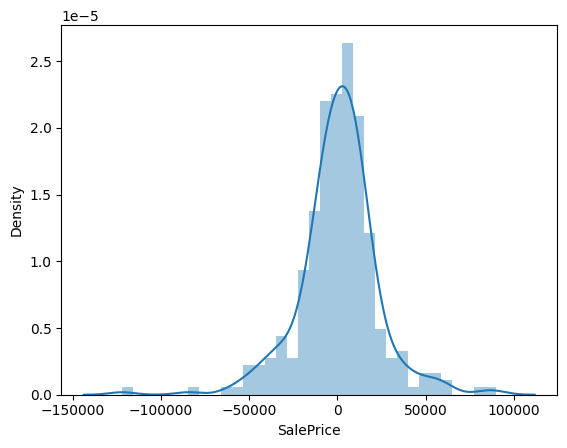

In [472]:
sns.distplot(Y_test-yhat)

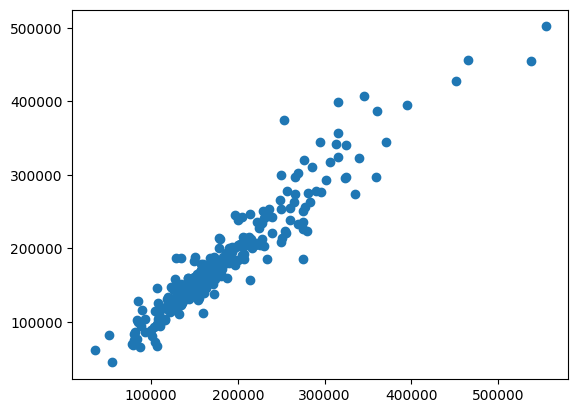

In [473]:
plt.scatter(Y_test,yhat)

# Model Serializing

In [474]:
import joblib

In [475]:
joblib.dump(model,'House-price-prediction.pkl')

['House-price-prediction.pkl']

In [476]:
joblib.dump(sc,'Standard_Scaler.pkl')

['Standard_Scaler.pkl']

In [477]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
